In [166]:
%matplotlib inline
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 
from sklearn import linear_model
df = pd.read_csv('C://Users//13195//Desktop//ANALY//640//HW1//Hitters.csv')
df = df.dropna(subset = ['Salary']) # drop missing record
X = df.select_dtypes(include = ['int64']) # numeric variables other than salary
colname = X.columns
y=df.Salary


In [167]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 16 columns):
AtBat      263 non-null int64
Hits       263 non-null int64
HmRun      263 non-null int64
Runs       263 non-null int64
RBI        263 non-null int64
Walks      263 non-null int64
Years      263 non-null int64
CAtBat     263 non-null int64
CHits      263 non-null int64
CHmRun     263 non-null int64
CRuns      263 non-null int64
CRBI       263 non-null int64
CWalks     263 non-null int64
PutOuts    263 non-null int64
Assists    263 non-null int64
Errors     263 non-null int64
dtypes: int64(16)
memory usage: 34.9 KB


**1.1 LASSO(Create visualization of the coefficient trajectories) **

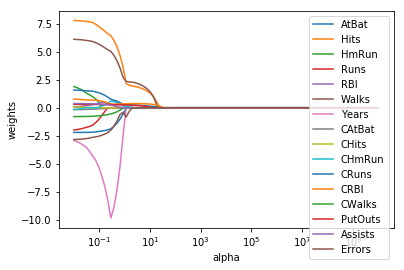

In [196]:
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5
for i in alphas:
    coefs.append(linear_model.Lasso(alpha= i, normalize = True, max_iter=10000).fit(X, y).coef_)
ax = plt.gca()

ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(colname)


In [171]:
coef = linear_model.Lasso(alpha= 10**(1), normalize = True, max_iter=10000).fit(X, y).coef_
colname[abs(coef) != 0]    #Check which variables are still in the model


Index(['Hits', 'CRuns', 'CRBI'], dtype='object')

**Comment on which are the final three predictors that remain in the model**


Based on the graph and result from above cell, we found Hits, Cruns and CRBI are stil in the model.

In [180]:
#USE 10-FOLD cross validation to find best alphas
lassocv = LassoCV(cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

print('The best alpha chosen by cross validation is ',lassocv.alpha_)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print('mean squared error is ',mean_squared_error(y_test, lasso.predict(X_test)))
pd.Series(lasso.coef_, index=X.columns)

The best alpha chosen by cross validation is  5.849698061550466
mean squared error is  121038.55449422123


AtBat      0.000000
Hits       2.756761
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      2.056378
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.199513
CRuns      0.000000
CRBI       0.431293
CWalks     0.000000
PutOuts    0.368242
Assists   -0.000000
Errors    -0.000000
dtype: float64

There are 5 variables left in the model when we use optimal value, they are Hits, Walks, CHmRun, CRBI and PutOuts

**Ridge Regression**

Create visualization of the coefficient trajectories

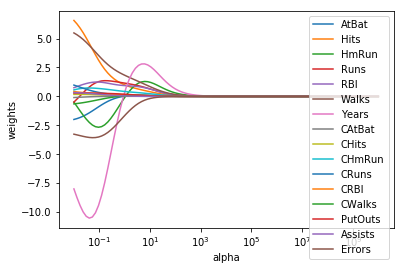

In [199]:
coefs1 = []
for i in alphas:
    coefs1.append(linear_model.Ridge(alpha= i, normalize = True, max_iter=10000).fit(X, y).coef_)
ax1 = plt.gca()
ax1.plot(alphas*2, coefs1)
ax1.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(colname)


In [200]:
model = linear_model.RidgeCV(cv=10, alphas = alphas, normalize = True).fit(X, y)
print('optimal penalty alpha: ', round(model.alpha_,2))
print('coefficients are: ', linear_model.Ridge(alpha= model.alpha_, normalize = True, max_iter=10000).fit(X, y).coef_)

optimal penalty alpha:  1.0
coefficients are:  [ 0.09411006  0.77211242  0.74182085  1.03481494  0.8957186   1.5293312
  2.03545578  0.01124224  0.05276016  0.36941526  0.1062445   0.10987632
  0.06712935  0.14841077  0.02480697 -0.99621512]


C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The optimal value of penalty is 1.0

Short Answer
**Explain in your own words the bias-variance tradeoff**
Variance refer to how MSE gonna change if we use different training data. Bias refer to difference between predicted valua and the truth, since there is no model can 100% predict the true data. 
Bias-variance tradeoff refer to how to balance the weight of bias and variance. If we want higher variance which leads to more flexible, then our model is overfit and we have lower bias. On the contrary, if we wanna higher bias which leads to stable model, we will have lower variance since we may get similar result for different training data set.

**What role does regularization play in this tradeoff?**
A good model should have good balance between bias and variance, regularization is a tool that it penalizes each weight and shrink the contribution of each features.

**Make reference to your finndings in number (1) to describe models of high/low bias and variance.**
The LASSO uses L1 regularization technique as penalty on the size of coefficients, it aims to minimize the absolute sum of residual. When the penalty increases, the value of coefficients of each feautures will be shrinked respectively even get close to zero, so the variance decreases while bias increases. 

The Ridge uses L2 regularization technique, it aims to minimize the the residual sum of squares. When the penalty increases, the value of coefficients of each feautures will be shrinked, the variance decreases while bias increases

